# SVM Simulation

## Data Preparation

In [1]:
# add required libraries
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [2]:
!pip install -q nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# set random seed to reproduce the same result every time
np.random.seed(500)

In [4]:
# import the corpus
Corpus = pd.read_csv("500_Reddit_users_posts_labels.csv", encoding='latin-1')

## Data Preprocessing

### Tokenization & Word Stemming/Lemmatization

In [5]:
# Step - a : Remove blank rows if any.
Corpus['Post'].dropna(inplace=True)

# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['Post'] = [entry.lower() for entry in Corpus['Post']]

# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['Post']= [word_tokenize(entry) for entry in Corpus['Post']]

# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['Post']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

In [6]:
!pip install -q tabulate

import pandas as pd
from tabulate import tabulate

# display a few rows of the preprocessed text
print(tabulate(Corpus.head(), headers='keys', tablefmt='psql'))

+----+--------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Split dataset

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(Corpus['text_final'],Corpus['Label'],test_size=0.3, random_state=42)

### Encoding

In [8]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

### Word Vectorization

In [9]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [10]:
# see the vocabulary that it has learned from the corpus
print(Tfidf_vect.vocabulary_)

{'viable': 4762, 'option': 3045, 'youll': 4986, 'leave': 2507, 'wife': 4898, 'behind': 423, 'youd': 4985, 'pain': 3095, 'beyond': 452, 'suck': 4259, 'worry': 4946, 'money': 2830, 'know': 2455, 'first': 1695, 'hand': 1973, 'definitely': 1126, 'feel': 1658, 'hopeless': 2107, 'seem': 3829, 'tire': 4499, 'aware': 339, 'might': 2771, 'need': 2909, 'chip': 728, 'financially': 1687, 'time': 4495, 'issue': 2378, 'even': 1510, 'hour': 2127, 'asthenia': 292, 'could': 953, 'alleviate': 146, 'lot': 2607, 'pressure': 3342, 'meantime': 2712, 'get': 1861, 'shit': 3912, 'together': 4506, 'write': 4962, 'resume': 3667, 'tomorrow': 4512, 'excuse': 1550, 'do': 1280, 'send': 3841, 'whether': 4881, 'believe': 427, 'sort': 4080, 'powerful': 3310, 'force': 1744, 'govern': 1895, 'thing': 4462, 'really': 3532, 'work': 4938, 'big': 456, 'test': 4427, 'pull': 3450, 'try': 4593, 'stay': 4174, 'positive': 3289, 'everything': 1521, 'hard': 1991, 'appreciate': 243, 'notion': 2966, 'meet': 2731, 'someone': 4064, 'els

In [11]:
# vectorized data
print(Train_X_Tfidf)

  (0, 4991)	0.10800931466182243
  (0, 4988)	0.12667772111610137
  (0, 4975)	0.04924426800938957
  (0, 4965)	0.012419158884874217
  (0, 4958)	0.023995873347476535
  (0, 4957)	0.1439752400848592
  (0, 4954)	0.13019428220089982
  (0, 4950)	0.012001034962424714
  (0, 4946)	0.07425103254440905
  (0, 4945)	0.02238907689409131
  (0, 4944)	0.010656266194726061
  (0, 4938)	0.03582550544974401
  (0, 4937)	0.028160798585233394
  (0, 4935)	0.021971167148479572
  (0, 4931)	0.04840318182403305
  (0, 4905)	0.04591988329733795
  (0, 4874)	0.013844885878765815
  (0, 4872)	0.012715599427266414
  (0, 4864)	0.016811276585842073
  (0, 4858)	0.019105553282756815
  (0, 4837)	0.01600628245797449
  (0, 4818)	0.13011452847906466
  (0, 4809)	0.01656017324365014
  (0, 4804)	0.02516305170273311
  (0, 4718)	0.010446643989096423
  :	:
  (349, 218)	0.05460936694014172
  (349, 216)	0.007638524129150748
  (349, 215)	0.01845239763242032
  (349, 205)	0.009671561566252459
  (349, 203)	0.007699303447654728
  (349, 181)	0.0

## Multi-class Classification (One vs Rest)

In [12]:
!pip install -q scikit-learn

In [13]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from mlxtend.plotting import plot_decision_regions

In [14]:
# create an instance of the SVM model
svm = SVC(probability=True, random_state=42)

In [15]:
# make SVM an OvR classifier
ovr_classifier = OneVsRestClassifier(svm)

In [16]:
# fit the data to the OvR classifier
ovr_classifier = ovr_classifier.fit(Train_X_Tfidf, y_train)

## Evaluate Results

In [17]:
# accuracy score
from sklearn.metrics import accuracy_score

# Predict the labels for the test set
y_pred = ovr_classifier.predict(Test_X_Tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.29333333333333333


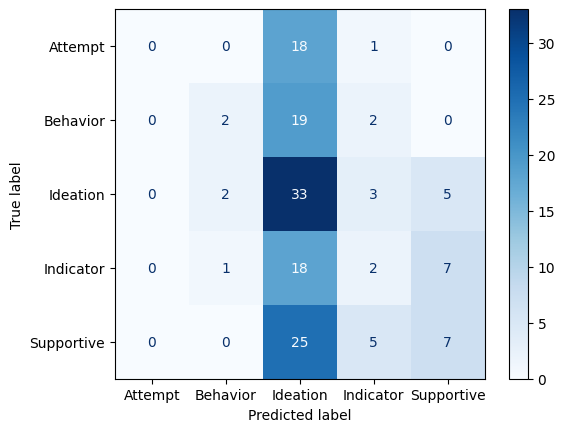

In [18]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [19]:
# precision, recall, f1 score
from sklearn.metrics import classification_report
import warnings
# Suppress the specific UndefinedMetricWarning
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Generate a classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred, target_names=Encoder.classes_))

              precision    recall  f1-score   support

     Attempt       0.00      0.00      0.00        19
    Behavior       0.40      0.09      0.14        23
    Ideation       0.29      0.77      0.42        43
   Indicator       0.15      0.07      0.10        28
  Supportive       0.37      0.19      0.25        37

    accuracy                           0.29       150
   macro avg       0.24      0.22      0.18       150
weighted avg       0.26      0.29      0.22       150



In [20]:
# Generate precision, recall, f1 score with different averaging methods
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
# Suppress the specific UndefinedMetricWarning
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f'Macro Precision: {precision_macro}')
print(f'Macro Recall: {recall_macro}')
print(f'Macro F1-score: {f1_macro}')

precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print('\n')
print(f'Weighted Precision: {precision_weighted}')
print(f'Weighted Recall: {recall_weighted}')
print(f'Weighted F1-score: {f1_weighted}')

Macro Precision: 0.24286052094156427
Macro Recall: 0.22300322856440147
Macro F1-score: 0.1826990083087644


Weighted Precision: 0.2646452891930302
Weighted Recall: 0.29333333333333333
Weighted F1-score: 0.22306486196730096


In [21]:
from sklearn.metrics import roc_auc_score

# Compute ROC-AUC score using probabilities
roc_auc = roc_auc_score(y_test, ovr_classifier.predict_proba(Test_X_Tfidf), multi_class='ovr')
print(f'ROC-AUC: {roc_auc}')

ROC-AUC: 0.6278260530667457


## Impact of Missing features


In [22]:
# Access coefficients from the original model
original_coefficients = [estimator.coef_ for estimator in ovr_classifier.estimators_]

AttributeError: coef_ is only available when using a linear kernel

In [ ]:
# Introduce missingness (example with 20% missingness)
Train_X_Tfidf_missing = introduce_missingness(Train_X_Tfidf, 0.2)

In [ ]:
# Retrain the model with missing data
ovr_classifier_missing = OneVsRestClassifier(svm)
ovr_classifier_missing = ovr_classifier_missing.fit(Train_X_Tfidf_missing, y_train)

In [ ]:
# Access coefficients from the retrained model
missing_coefficients = [estimator.coef_ for estimator in ovr_classifier_missing.estimators_]

# Example: Compare coefficients for the first class
original_coef = original_coefficients[0].flatten()
missing_coef = missing_coefficients[0].flatten()

# Find indices of top N important features (example with N=10)
top_N = 10
important_feature_indices = np.argsort(np.abs(original_coef))[::-1][:top_N]


## Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(Train_X_Tfidf, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.357 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.371 total time=   0.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.371 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.371 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.357 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.357 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.371 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.371 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.371 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.357 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.357 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [28]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


In [29]:
grid_predictions = grid.predict(Test_X_Tfidf)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.32      0.26      0.29        23
           2       0.31      0.63      0.42        43
           3       0.19      0.11      0.14        28
           4       0.45      0.35      0.39        37

    accuracy                           0.33       150
   macro avg       0.25      0.27      0.25       150
weighted avg       0.28      0.33      0.29       150

